# 1

Формулы, задающие доверительный интервал для доли:

$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$  - нормальный

$\frac1{ 1 + \frac{z_{1-\frac{\alpha}{2}}^2}{n} } \left( \hat{p} + \frac{z_{1-\frac{\alpha}{2}}^2}{2n} \pm z_{1-\frac{\alpha}{2}} \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{z_{1-\frac{\alpha}{2}}^2}{4n^2} } \right)$  - Уилсона

In [1]:
# 2
from statsmodels.stats.proportion import proportion_confint

normal_interval = proportion_confint(1, 50, method = 'normal')
print "Normal interval: [%.4f, %.4f]" % normal_interval
print "Lower bound: %.4f" % normal_interval[0]

Normal interval: [-0.0188, 0.0588]
Lower bound: -0.0188


In [2]:
# 3
wilson_interval = proportion_confint(1, 50, method = 'wilson')
print "Wilson interval: [%.4f, %.4f]" % wilson_interval
print "Lower bound: %.4f" % wilson_interval[0]

Wilson interval: [0.0035, 0.1050]
Lower bound: 0.0035


# 4
Интервал Уилсона выглядит более вменяемым, так как не принимает отрицательных значений. Это неудивительно; ведь интервал Уилсона как раз применяется в случаях близких к 0 или 1.

In [3]:
# 5
import numpy as np
import scipy

def maya_interval(p):
    return np.ceil((scipy.stats.norm.ppf(1-0.05/2) * np.sqrt(p*(1-p)) / 0.01)**2)

print "Necessary number of tests when p=0.02 is", int(maya_interval(0.02))

Necessary number of tests when p=0.02 is 753


Populating the interactive namespace from numpy and matplotlib
Maximum necessary number objects is 9604


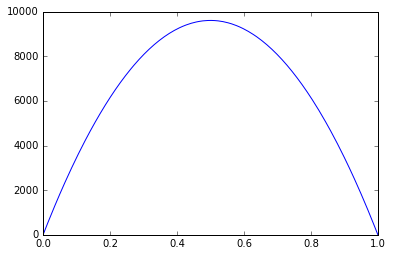

In [4]:
# 6
import matplotlib.pyplot as plt

%pylab inline
x = np.linspace(0, 1, 200)
y = maya_interval(x)
plt.plot(x, y)
print "Maximum necessary number objects is", int(max(y))

In [13]:
worst_p = 0
worst_n = 0
for curr_p in np.linspace(0, 1, 200):
    curr_n = maya_interval(curr_p)
    if curr_n > worst_n:
        worst_n = curr_n
        worst_p = curr_p
        
print "Worst p to make prediction is %.2f" % worst_p

Worst p to make prediction is 0.50
